In [2]:
import Tkinter as tk
import tkFileDialog
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
tk.Tk().withdraw()
path=tkFileDialog.askdirectory()
print path

/home/edward/Project /Image_Data


In [3]:
def load_images(folder):
        image_list=[]
        for filename in os.listdir(folder):
            img=cv2.imread(os.path.join(folder,filename))
            if img is not None:
                image_list.append(img)
        return image_list

In [4]:
images=load_images(path)

In [5]:
images[0].shape 

(768, 1024, 3)

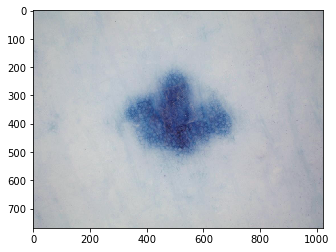

In [6]:
%matplotlib inline
plt.imshow(images[0])

In [10]:
def resize_images(images):
    resize_image=[]
    for image in images:
        imag=cv2.resize(image,(512,512))
        resize_image.append(imag)
    return resize_image

In [11]:
A=resize_images(images)

In [12]:
len(A)

100

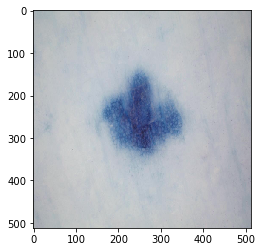

In [13]:
plt.imshow(A[0])

In [14]:
A[0].shape

(512, 512, 3)

In [63]:
"""def save_images():
        tk.Tk().withdraw()
        path=tkFileDialog.askdirectory()
        for i in range(len(A)):
                return cv2.imwrite(os.path.join(path,'imageresized_{}.jpg'.format(i)),A[i])
        """

In [15]:
for i in range(1,len(A)+1):
    cv2.imwrite(('imageresized_{}.jpg'.format(i)),A[i-1])
    #print 'imageresized_{}.jpg'.format(i)

In [23]:
I=cv2.imread('imageresized_4.jpg')
#cv2.namedWindow("preview")
cv2.imshow("preview", I)
cv2.waitKey()

255

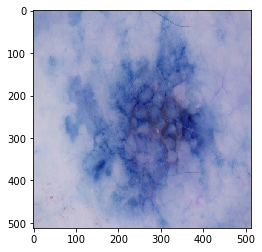

In [24]:

plt.imshow(I)

In [25]:
IGray=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)

In [26]:
IGray.shape

(512, 512)

In [27]:
cv2.imshow("Gray", IGray)
cv2.waitKey(0)

255

In [28]:
ret,BW=cv2.threshold(IGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [29]:
cv2.imshow("BW", BW)
cv2.waitKey(0)

255

In [30]:
#ret1,thresh1 = cv2.threshold(th,127,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(BW,127,255,cv2.THRESH_BINARY_INV)

In [31]:
cv2.imshow("TH1", thresh2)
cv2.waitKey()

255

In [32]:
thresh2.dtype

dtype('uint8')

In [33]:
def mask(mask,RGBImage):
    #R=RGBImage[:,:,2]
    #G=RGBImage[:,:,1]
    #B=RGBImage[:,:,0]
    B,G,R=cv2.split(RGBImage)
    maskRed=np.multiply(R,mask)
    maskGreen=np.multiply(G,mask)
    maskBlue=np.multiply(B,mask)
    maskedImage = cv2.merge([maskRed,maskGreen,maskBlue])
    return maskedImage

In [34]:
maskedImage=mask(thresh2,I)

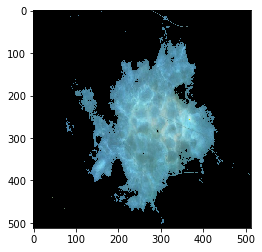

In [35]:
%matplotlib inline
plt.imshow(maskedImage)

In [36]:
thresh2.dtype

dtype('uint8')

In [37]:
cv2.imshow("BGRemovedImage", maskedImage)
cv2.waitKey()

255

In [38]:
cv2.imwrite("BGremovedImage.jpg",maskedImage)

True

In [39]:
ret1,thresh1 = cv2.threshold(IGray,127,255,cv2.THRESH_BINARY)

In [40]:
R=np.multiply(thresh2,I[:,:,2])
G=np.multiply(thresh2,I[:,:,1])
B=np.multiply(thresh2,I[:,:,0])
maskImage = cv2.merge([R,G,B])
cv2.imshow("BGRemovedImage", maskImage)
cv2.waitKey()

255

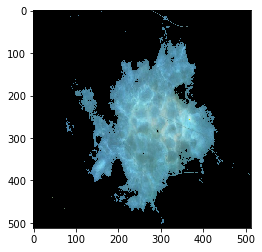

In [47]:
plt.imshow(maskImage)
